# Unit 5 - Financial Planning

In [141]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [142]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [143]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [144]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

#btc_url = btc_url + "?format=json"
#eth_url = eth_url + "?format=json"

In [145]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url)

# Fetch current ETH price
# YOUR CODE HERE!
eth_price = requests.get(eth_url)

In [146]:
# Converting the data into json format
btc = btc_price.json()
eth = eth_price.json()

In [147]:
print(json.dumps(btc, indent=4)) # printing the btc price dictionary in a neat way to find the value

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18824531,
            "total_supply": 18824531,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 44530.0,
                    "volume_24h": 32399037529,
                    "market_cap": 838236105105,
                    "percentage_change_1h": -0.664798460693811,
                    "percentage_change_24h": 2.12686999257987,
                    "percentage_change_7d": -6.99513212907029,
                    "percent_change_1h": -0.664798460693811,
                    "percent_change_24h": 2.12686999257987,
                    "percent_change_7d": -6.99513212907029
                },
                "CAD": {
                    "price": 56878.169,
                    "volume_24h": 41383290635.7917,
                    

In [148]:
print(json.dumps(eth, indent=4)) # printing the eth price dictionary in a neat way to find the value

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 117649335,
            "total_supply": 117649335,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3103.68,
                    "volume_24h": 18577486874,
                    "market_cap": 365036316040,
                    "percentage_change_1h": -1.2246608550301,
                    "percentage_change_24h": 1.24779713945654,
                    "percentage_change_7d": -13.1426059514056,
                    "percent_change_1h": -1.2246608550301,
                    "percent_change_24h": 1.24779713945654,
                    "percent_change_7d": -13.1426059514056
                },
                "CAD": {
                    "price": 3964.330464,
                    "volume_24h": 23729023984.1602,
                   

In [149]:
# Compute current value of my crpto
# YOUR CODE HERE!
btc_cad = btc["data"]["1"]["quotes"]["CAD"]["price"]
eth_cad = eth["data"]["1027"]["quotes"]["CAD"]["price"]

my_btc_value = my_btc * btc_cad
my_eth_value = my_eth * eth_cad

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68253.80
The current value of your 5.3 ETH is $21010.95


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [150]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [151]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [152]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-09-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# dropping the time component from index
df_portfolio.index = df_portfolio.index.date 

# Preview DataFrame
df_portfolio

AGG                                      SPY                 \
              open    high     low   close   volume    open    high    low   
2021-09-23  115.93  115.94  115.57  115.57  7516613  439.84  444.89  439.6   

                              
             close    volume  
2021-09-23  443.13  67408294

In [153]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.57
Current SPY closing price: $443.13


In [154]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22156.50
The current value of your 200 AGG shares is $23114.00


### Savings Health Analysis

In [155]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
crypto_savings = my_btc_value + my_eth_value
shares_savings = my_spy_value + my_agg_value

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data={"amount":[crypto_savings,shares_savings]},index=["crypto","shares"])

# Display savings DataFrame
df_savings

,amount
crypto,89264.754259
shares,45270.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

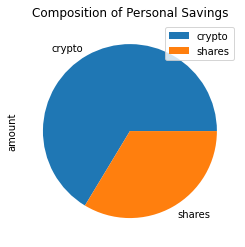

In [156]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind="pie",y="amount",title="Composition of Personal Savings")

In [157]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_savings + shares_savings

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching your financial goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [158]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-23', tz='America/New_York').isoformat()

In [159]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907  252.69   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971  253.51   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251  254.15   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706  254.63   
2017-10-10 00:00:00-04:00  109.47  109.61  109.3999  109.43  1502645  254.62   

                                                             
                             high     low   close    volume  
time                                                         
2017-10-04 00:00:00-04:00  253.44  252.56  253.16  30217246  
2017-10-05 00:00:00-04:00  254.68  253.40  254.64  45350955  
2017-10-06 00:00:00-04:00  254.46  253.85  254.40  40706912  
2017-10-09 00:00:00-04:00  254.70  253.65  253.96  23554888  
2017-10-10 00:00:00-04:00  255.05  253.98  254.60  28248210

In [160]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Thirty_Year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [161]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Thirty_Year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706   
2017-10-10 00:00:00-04:00  109.47  109.61  109.3999  109.43  1502645   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-04 00:00:00-04:00          NaN  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   
2017-10-10 00:00:00-04:00     0.000274  254.62  255.05  253.98  254.60   

                                                  
                             volume daily_return  
time                                              
2017-10-04 00:00:00-04:00  30217246          NaN  
2017-10-05 00:00:00-04:00  45350955     0.005846  
2017-10-06 00:00:00-04:00  40706912    -0.000943  
2017-10-09 00:00:00-04:00  23554888    -0.001730  
2017-10-10 00:00:00-04:00  28248210     0.002520

In [162]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Thirty_Year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997111,0.989568,1.002829,0.989116,0.984519,1.006628,1.000857,0.998808,0.990298,1.006982,...,1.008906,0.994824,1.008619,1.006273,0.998479,0.988221,0.997813,0.993474,1.001411,1.004153
2,0.990301,0.987893,0.999313,0.980309,0.993446,1.003436,1.001351,0.991561,0.994185,1.001086,...,1.015999,0.995676,1.007669,1.008001,0.997331,1.001922,0.995845,0.978181,0.998676,1.012987
3,0.985310,0.991072,1.002111,0.972836,0.994206,0.990660,0.999365,0.999907,0.995543,1.017314,...,1.026001,1.005147,1.005254,0.999636,0.983895,1.004220,0.997516,0.971203,0.996690,1.021149
4,0.984160,0.996236,1.010424,0.971993,0.998615,0.977853,1.001979,1.008408,0.979009,1.015599,...,1.026802,0.998723,1.000133,1.009921,0.979875,1.014602,1.005298,0.960057,0.989765,1.013263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.353380,27.555167,21.017026,47.706749,41.408825,10.877351,21.613388,4.575194,13.443970,8.806581,...,6.201001,10.028836,121.245062,49.445835,18.074806,43.781653,20.057995,11.918627,15.385271,76.143234
7557,17.261462,27.675604,21.252803,48.155937,41.551279,10.812334,21.608076,4.612717,13.532897,8.843149,...,6.209980,10.001077,120.724095,49.429379,18.089819,43.846407,20.171242,11.900702,15.404015,76.127072
7558,17.172785,27.897748,21.447977,48.158531,41.214345,10.895148,21.299868,4.570096,13.717438,8.895161,...,6.206310,9.974018,120.219391,49.126587,17.979401,43.759665,19.943956,11.960775,15.327127,76.811543
7559,17.189725,27.749905,21.556988,48.384554,41.499428,10.811644,21.272464,4.639041,13.633893,8.858940,...,6.187660,10.050030,121.161655,48.945840,18.180206,43.450017,19.739160,11.883701,15.507903,75.694805


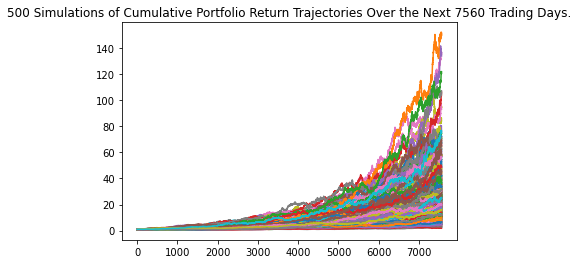

In [163]:
# Plot simulation outcomes
line_plot = MC_Thirty_Year.plot_simulation()

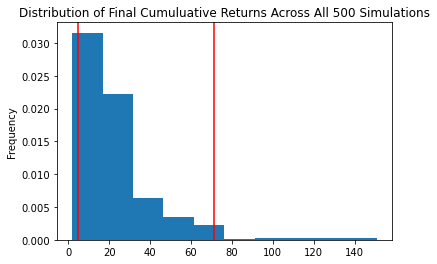

In [164]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Thirty_Year.plot_distribution()

### Retirement Analysis

In [165]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Thirty_Year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             23.208208
std              19.706524
min               1.825022
25%              10.963597
50%              17.571232
75%              27.578046
max             150.679686
95% CI Lower      4.755172
95% CI Upper     71.393005
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [166]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95103.45 and $1427860.09


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [167]:
# Set initial investment
increased_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_inc_investment = round(tbl[8]*increased_investment,2)
ci_upper_inc_investment = round(tbl[9]*increased_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_inc_investment} and ${ci_upper_inc_investment}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $142655.17 and $2141790.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [168]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Five_Year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [169]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Five_Year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004500,1.018205,1.003603,0.998752,1.000468,1.010765,0.995192,0.989812,0.993700,0.996447,...,1.008113,0.992970,1.001832,0.999183,1.003591,1.009168,0.993622,0.985516,1.004244,0.992829
2,0.998155,1.036443,1.002888,1.012629,0.986467,0.997557,0.993100,1.005671,0.996043,0.988654,...,1.013005,0.981485,0.997600,0.984158,0.998030,0.992524,1.011580,0.985393,0.999198,0.989438
3,0.988017,1.030776,1.003244,0.999085,0.985129,0.994519,0.982334,1.002770,0.991927,0.995338,...,1.021705,1.005713,1.017267,0.983257,0.992824,0.995478,1.019714,0.999934,0.992161,0.988642
4,0.993357,1.029359,0.992001,1.011235,0.980092,0.996799,0.962672,1.008093,0.986067,1.005432,...,1.023379,1.003899,1.017002,0.986769,0.995559,0.993912,1.028565,0.977799,0.997604,0.992914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.438706,1.820103,2.165480,2.307738,1.482923,1.815400,2.052186,1.196131,1.199687,2.600724,...,2.763139,1.066270,1.942056,2.187550,1.617376,0.895261,2.583397,2.200965,2.765377,2.416245
1257,2.461783,1.804441,2.112607,2.305286,1.495044,1.807431,2.083266,1.189778,1.202683,2.599367,...,2.764133,1.069800,1.927579,2.180066,1.610813,0.885154,2.596241,2.194175,2.770564,2.415082
1258,2.476437,1.805889,2.084349,2.355252,1.497430,1.817498,2.139758,1.209932,1.181877,2.592375,...,2.781630,1.081228,1.929499,2.157024,1.618222,0.887335,2.571338,2.196537,2.793596,2.404726
1259,2.508720,1.810200,2.101354,2.385117,1.515746,1.795221,2.144776,1.198545,1.180286,2.634509,...,2.793357,1.067833,1.926415,2.154307,1.597311,0.884733,2.605543,2.195919,2.784727,2.341880


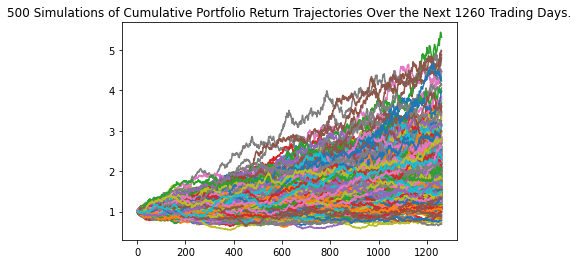

In [170]:
# Plot simulation outcomes
line_plot_five_years = MC_Five_Year.plot_simulation()

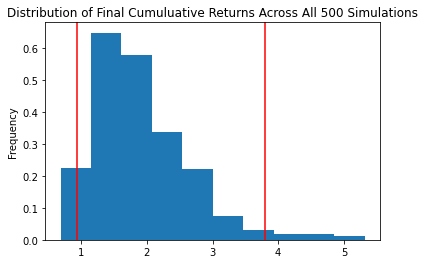

In [171]:
# Plot probability distribution and confidence intervals
dist_plot_five_years = MC_Five_Year.plot_distribution()

In [172]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five_years = MC_Five_Year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five_years)

count           500.000000
mean              1.909621
std               0.727007
min               0.686349
25%               1.405370
50%               1.763655
75%               2.268941
max               5.319226
95% CI Lower      0.930163
95% CI Upper      3.796280
Name: 1260, dtype: float64


In [173]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five_years[8]*initial_investment,2)
ci_upper_five = round(tbl_five_years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18603.26 and $75925.61


### Ten Years Retirement Option

In [174]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Ten_Year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [175]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Ten_Year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999340,1.005552,0.995751,1.002174,0.998407,0.988141,1.032105,1.016891,0.999072,0.981676,...,1.002293,1.001791,0.999305,1.027195,0.998424,1.018332,0.988975,1.023552,1.007996,1.021190
2,1.017571,0.998185,0.994200,1.005239,0.986732,0.979807,1.048191,1.033369,0.997416,0.984073,...,0.982997,1.020399,0.998204,1.015682,0.996415,1.012169,0.981772,1.012202,1.020261,1.018122
3,1.021385,1.011652,0.996946,1.010909,0.983808,0.984118,1.049298,1.048279,0.986977,0.968156,...,1.002372,1.026240,0.992603,1.035986,1.001762,1.002566,0.979684,1.017325,1.020106,1.014493
4,1.026007,1.015701,0.987902,1.030001,0.993592,0.963670,1.031818,1.057067,0.995995,0.969938,...,1.026267,1.028995,0.995360,1.018582,0.992103,1.003403,0.987205,1.015955,1.010644,1.001930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.527257,4.128595,1.055095,2.397884,2.634324,5.003291,1.788577,1.879190,12.559281,1.914412,...,4.464756,6.873843,5.888179,6.081327,3.432248,4.701167,8.079232,2.593525,4.328730,1.754407
2517,6.540552,4.118422,1.074001,2.438965,2.592077,5.068925,1.775557,1.917116,12.633181,1.912592,...,4.528687,6.968458,5.838312,6.103816,3.468950,4.611068,8.068722,2.570880,4.271204,1.768628
2518,6.580203,4.109422,1.070839,2.366133,2.568125,5.081360,1.798347,1.917415,12.951206,1.884125,...,4.570939,7.029918,5.843331,6.072809,3.475146,4.638217,8.099566,2.597211,4.279864,1.778248
2519,6.577718,4.061340,1.055905,2.298699,2.518341,5.104408,1.770559,1.915203,12.955865,1.839454,...,4.685846,6.970824,5.889418,6.045224,3.456551,4.594032,8.215507,2.616951,4.235922,1.791351


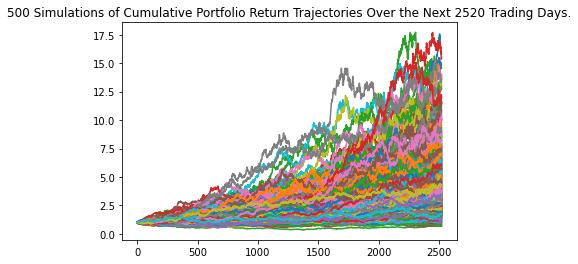

In [176]:
# Plot simulation outcomes
line_plot_ten_years = MC_Ten_Year.plot_simulation()

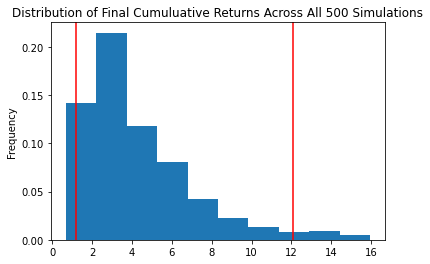

In [177]:
# Plot probability distribution and confidence intervals
dist_plot_ten_years = MC_Ten_Year.plot_distribution()

In [178]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten_years = MC_Ten_Year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten_years)

count           500.000000
mean              4.321317
std               2.746217
min               0.686786
25%               2.330424
50%               3.508022
75%               5.614121
max              15.944921
95% CI Lower      1.200723
95% CI Upper     12.056685
Name: 2520, dtype: float64


In [179]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl_ten_years[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten_years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24014.46 and $241133.7
